<a href="https://colab.research.google.com/github/AshSama12/wholesale-customer-data-analyze/blob/main/wholesale_customer_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import zipfile

# Unzip the dataset
with zipfile.ZipFile('/content/wholesale+customers.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [ ]:
# Load data
data = pd.read_csv('/content/Wholesale customers data.csv')

In [ ]:
#inspect data
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2

In [ ]:
#Handle missing value (if any)
missing_values = data.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

Missing values in each column:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [ ]:
# Feature scaling
scalar = StandardScaler()
scaled_data = scalar.fit_transform(data)

In [ ]:
# Convert back to DataFrame for convenience
scaled_data = pd.DataFrame(scaled_data, columns = data.columns)
print(scaled_data.head())

    Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367   
1  1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136   
2  1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536   
3 -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144   
4  1.448652  0.590668  0.840239 -0.052396 -0.079356  0.173859   

   Detergents_Paper  Delicassen  
0         -0.043569   -0.066339  
1          0.086407    0.089151  
2          0.133232    2.243293  
3         -0.498588    0.093411  
4         -0.231918    1.299347  


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(scaled_data.describe())

            Channel        Region         Fresh        Milk       Grocery  \
count  4.400000e+02  4.400000e+02  4.400000e+02  440.000000  4.400000e+02   
mean   1.614870e-17  3.552714e-16 -3.431598e-17    0.000000 -4.037175e-17   
std    1.001138e+00  1.001138e+00  1.001138e+00    1.001138  1.001138e+00   
min   -6.902971e-01 -1.995342e+00 -9.496831e-01   -0.778795 -8.373344e-01   
25%   -6.902971e-01 -7.023369e-01 -7.023339e-01   -0.578306 -6.108364e-01   
50%   -6.902971e-01  5.906683e-01 -2.767602e-01   -0.294258 -3.366684e-01   
75%    1.448652e+00  5.906683e-01  3.905226e-01    0.189092  2.849105e-01   
max    1.448652e+00  5.906683e-01  7.927738e+00    9.183650  8.936528e+00   

             Frozen  Detergents_Paper    Delicassen  
count  4.400000e+02      4.400000e+02  4.400000e+02  
mean   3.633457e-17      2.422305e-17 -8.074349e-18  
std    1.001138e+00      1.001138e+00  1.001138e+00  
min   -6.283430e-01     -6.044165e-01 -5.402644e-01  
25%   -4.804306e-01     -5.511349e-0

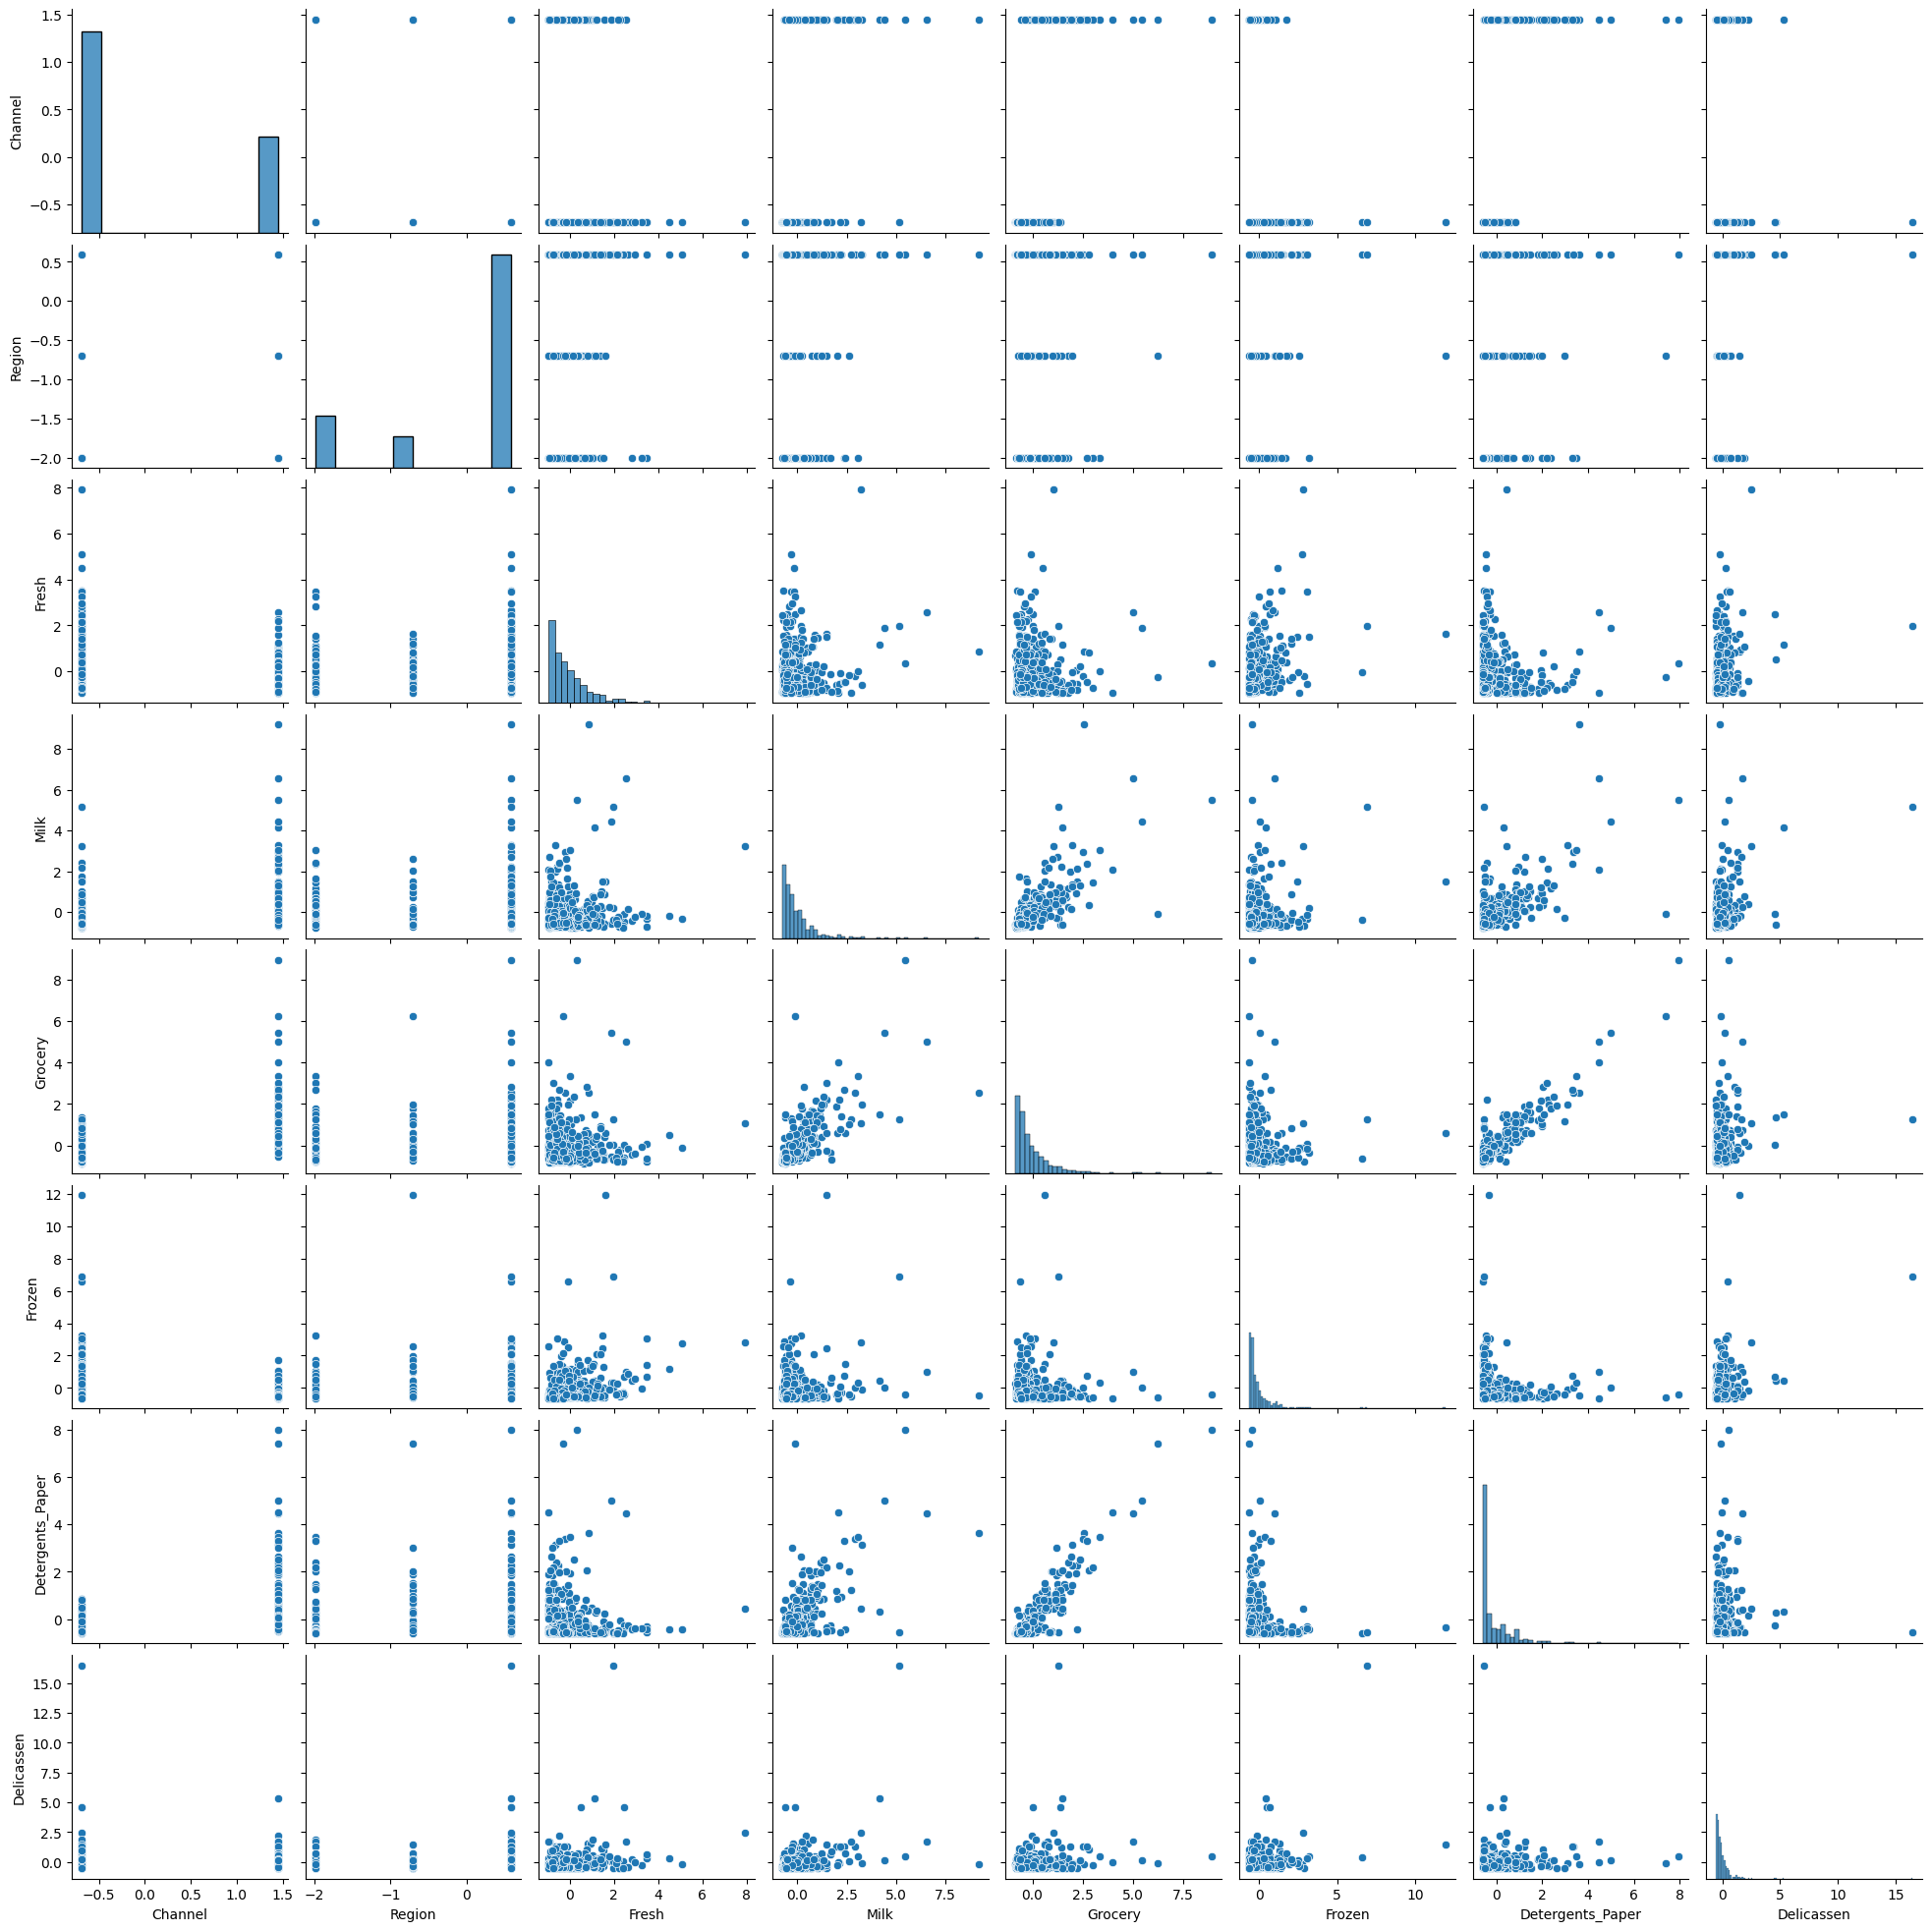

In [ ]:
# Pair plot
sns.pairplot(scaled_data)
plt.show()

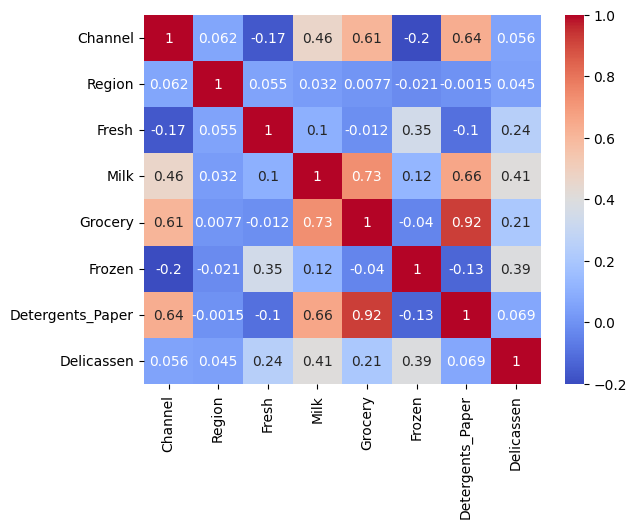

In [ ]:
# Correlation matrix
corr_matrix = scaled_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# K-Means clustering
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans_labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

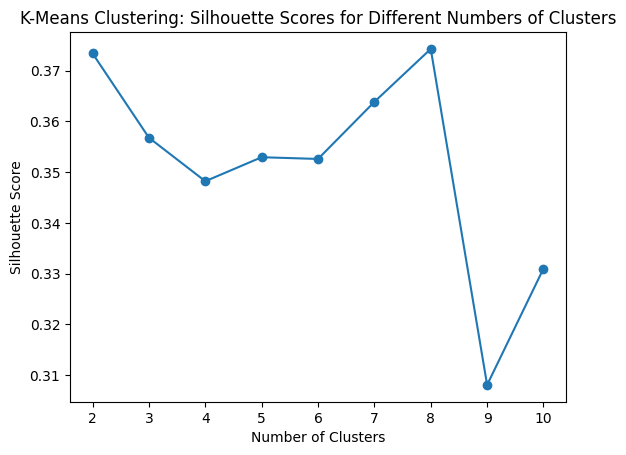

In [ ]:
# Plot silhouette scores
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('K-Means Clustering: Silhouette Scores for Different Numbers of Clusters')
plt.show()

In [ ]:
# Best K-Means
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
print(f'Best K-Means Silhouette Score: {max(silhouette_scores)} with {best_k} clusters')

Best K-Means Silhouette Score: 0.37426467849449924 with 8 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# Agglomerative clustering
agg_silhouette_scores = []

for k in k_range:
    agg = AgglomerativeClustering(n_clusters=k)
    agg_labels = agg.fit_predict(scaled_data)
    agg_silhouette_scores.append(silhouette_score(scaled_data, agg_labels))

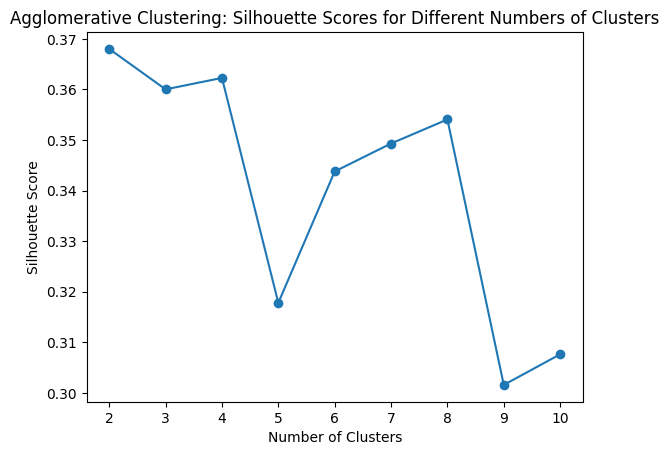

In [ ]:
# Plot silhouette scores
plt.plot(k_range, agg_silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Agglomerative Clustering: Silhouette Scores for Different Numbers of Clusters')
plt.show()

In [ ]:
# Best Agglomerative
best_agg_k = k_range[agg_silhouette_scores.index(max(agg_silhouette_scores))]
agg = AgglomerativeClustering(n_clusters=best_agg_k)
agg_labels = agg.fit_predict(scaled_data)
print(f'Best Agglomerative Silhouette Score: {max(agg_silhouette_scores)} with {best_agg_k} clusters')

Best Agglomerative Silhouette Score: 0.3680209405194812 with 2 clusters


In [ ]:
# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)
dbscan_score = silhouette_score(scaled_data, dbscan_labels)
print(f'DBSCAN Silhouette Score: {dbscan_score}')

DBSCAN Silhouette Score: -0.1310428843570635
